<a href="https://colab.research.google.com/github/HiyaJain22/ML-Mini-Project/blob/main/Client_Term_Deposit_Subscription_Forecasting_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/bank-full.csv")

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
unique_values=df.nunique()
unique_values

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [ ]:
print('Jobs:\n',df['job'].unique())
print('Marital:\n',df['marital'].unique())
print('Default:\n',df['default'].unique())
print('Education:\n',df['education'].unique())
print('Housing:\n',df['housing'].unique())
print('Loan:\n',df['loan'].unique())
print('Contact:\n',df['contact'].unique())
print('Month:\n',df['month'].unique())
print('Day:\n',df['day'].unique())
print('Campaign:\n',df['campaign'].unique())

Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital:
 ['married' 'single' 'divorced']
Default:
 ['no' 'yes']
Education:
 ['tertiary' 'secondary' 'unknown' 'primary']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']
Contact:
 ['unknown' 'cellular' 'telephone']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Day:
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Campaign:
 [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


In [ ]:
df['default'] = df['default'].map( {'yes':1 ,'no':0})
df['housing'] = df['housing'].map({'yes':1 ,'no':0})
df['loan'] = df['loan'].map({'yes':1 ,'no':0})
df['Target'] = df['Target'].map({'yes':1 ,'no':0})

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [ ]:
#Dropping unknow values form dataset
df.drop(df[df['marital'] == 'unknown' ].index , inplace=True)
df.drop(df[df['education'] == 'unknown' ].index , inplace=True)
df.drop(df[df['default'] == 'unknown' ].index , inplace=True)
df.drop(df[df['housing'] == 'unknown' ].index , inplace=True)
df.drop(df[df['loan'] == 'unknown' ].index , inplace=True)
df.drop(df[df['poutcome'] == 'unknown' ].index , inplace=True)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33,admin.,married,tertiary,0,882,0,0,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,single,secondary,0,-247,1,1,telephone,21,oct,519,1,166,1,other,1
24064,33,services,married,secondary,0,3444,1,0,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,married,tertiary,0,2415,1,0,telephone,22,oct,73,1,86,4,other,0
24077,36,management,married,tertiary,0,0,1,0,telephone,23,oct,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,0,1475,1,0,cellular,16,nov,1166,3,530,12,other,0
45201,53,management,married,tertiary,0,583,0,0,cellular,17,nov,226,1,184,4,success,1
45204,73,retired,married,secondary,0,2850,0,0,cellular,17,nov,300,1,40,8,failure,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1


In [ ]:
df.groupby('Target').mean()

<ipython-input-17-7532093d2111>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Target').mean()


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
Target,,,,,,,,,,
0,40.396929,0.008494,1421.351846,0.711859,0.160895,14.129860,215.525155,2.136720,234.376184,3.166612
1,42.161594,0.002214,1989.143885,0.348091,0.064748,14.681793,410.280022,1.784173,192.646929,3.280022


In [ ]:
cols=["age","duration","campaign","pdays","previous","balance"]
for i in cols:
    print(f"Skewness {i} : " + str(df[i].skew()))

Skewness age : 0.9691438809400422
Skewness duration : 2.5638699640037905
Skewness campaign : 2.4339639041753363
Skewness pdays : 0.6932408958411879
Skewness previous : 27.663014821733654
Skewness balance : 8.22944827839356


In [ ]:
corr=df.corr()

<ipython-input-19-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

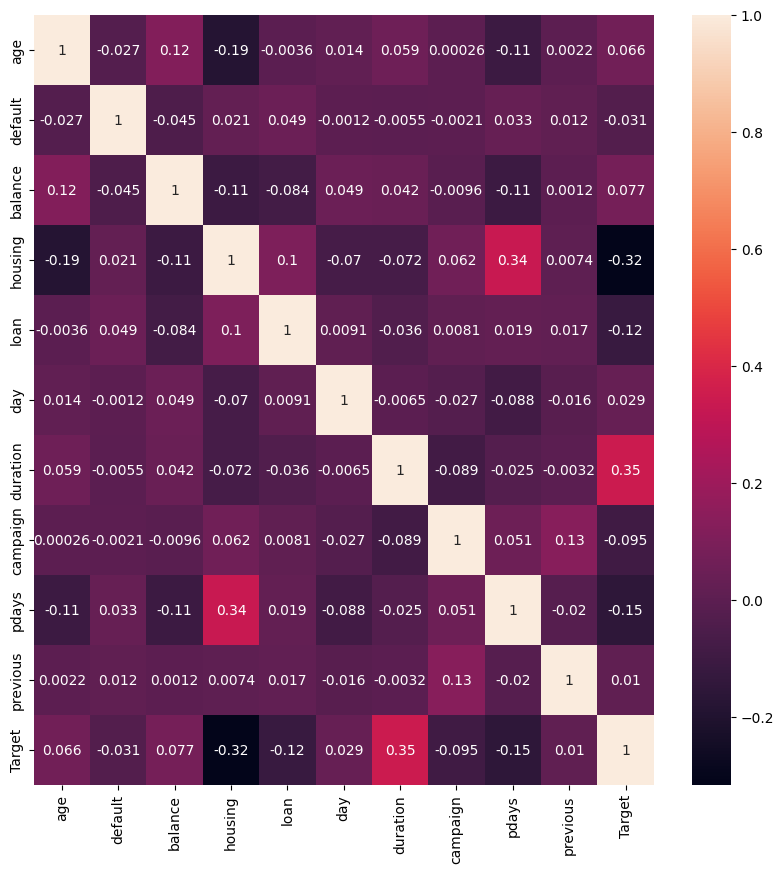

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [ ]:
import math
def multiple_eda_continuous(df, list_continuous):
    n_rows = math.ceil(len(list_continuous)/3)
    fig = plt.figure(figsize=(12,n_rows*5))
    palette = sns.color_palette('Set3', 10)

    for i, variable in enumerate(list_continuous):
        ax = fig.add_subplot(n_rows,3,i+1)
        sns.boxplot(x=variable, data=df, palette=[palette[i]], ax=ax)
        ax.set_ylabel('')
        ax.set_title(variable)

    plt.tight_layout()
    plt.show()

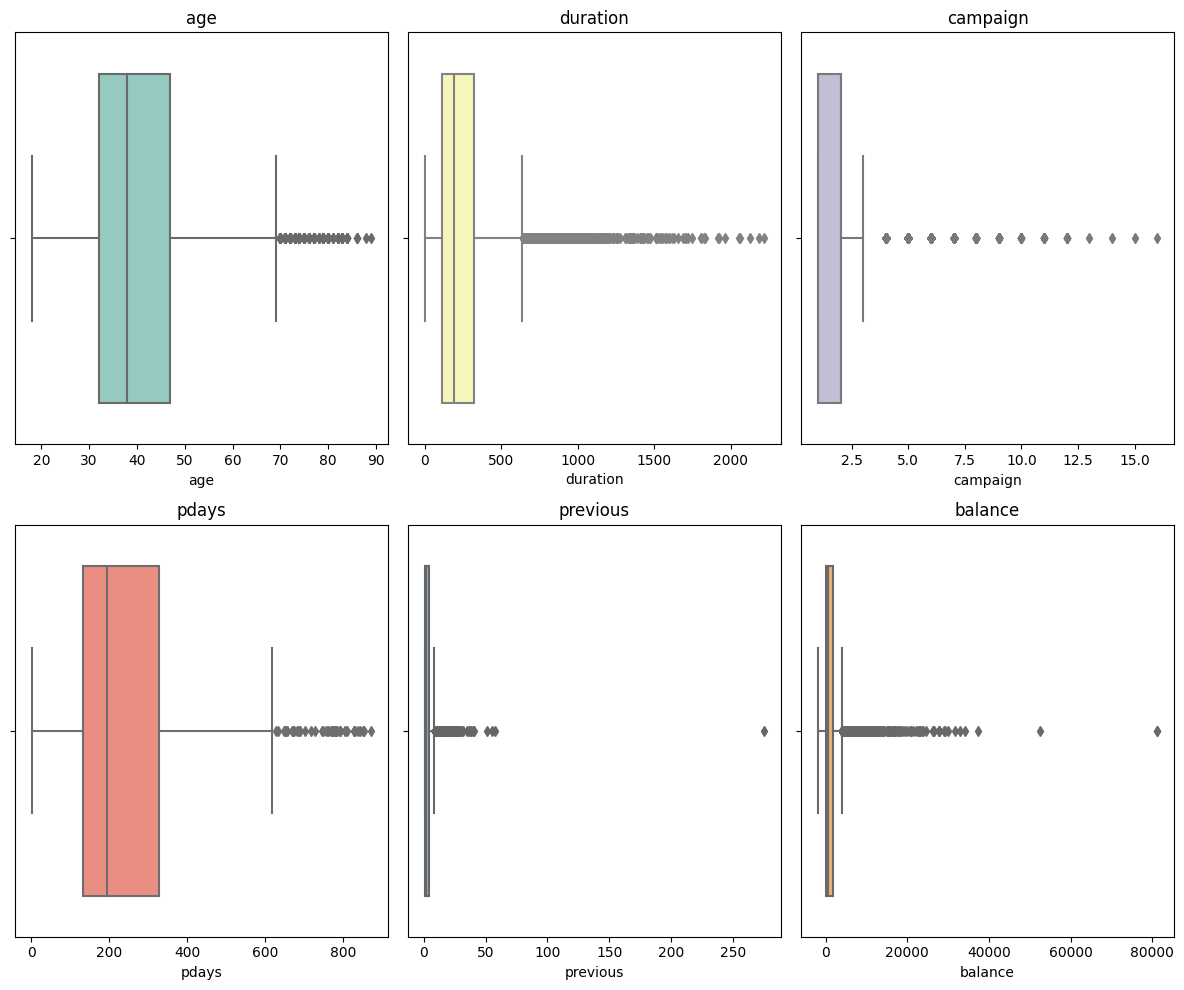

In [ ]:
multiple_eda_continuous(df, cols)

# Age

In [ ]:
print('Min age: ', df['age'].max())
print('Max age: ', df['age'].min())

Min age:  89
Max age:  18


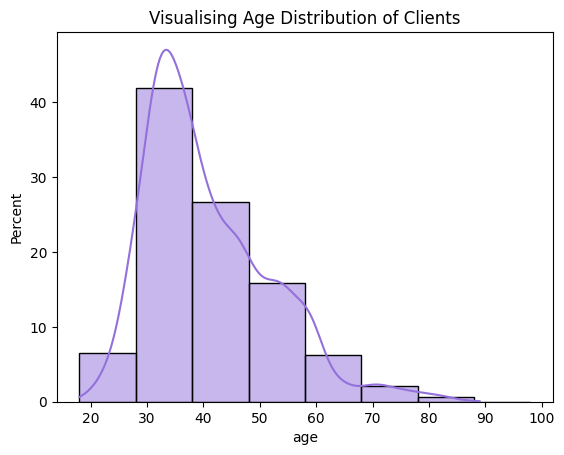

In [ ]:
age_plot = sns.histplot(data=df, x="age",stat="percent", color = "mediumpurple", binwidth= 10, kde=True, legend = True).set(title='Visualising Age Distribution of Clients')

The histogram class distribution for age variable shows that most of the dataset clients are between the ages of 25 and 48.


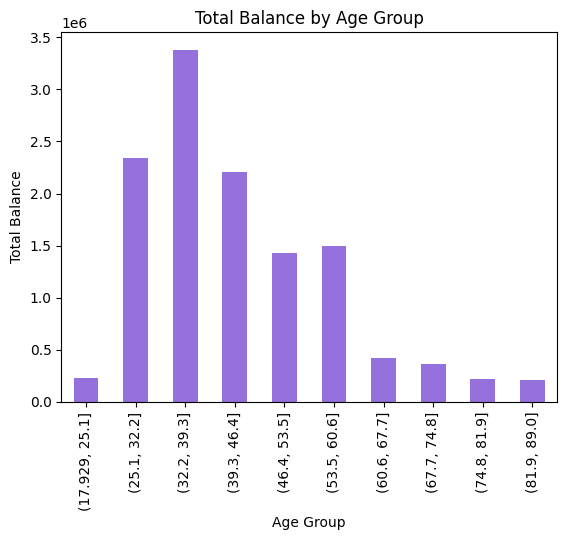

In [ ]:
age_bins = pd.cut(df['age'], bins=10)
grouped = df.groupby(age_bins)['balance'].sum()
grouped.plot(kind='bar', color='mediumpurple')
plt.title('Total Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Balance')

# Display the plot
plt.show()


This bar graph helps us to identify the average balance of each age group.Age between 32 to 39 has the highest balance in the their account

# Marital

[Text(0.5, 1.0, 'Marital Class Distribution')]

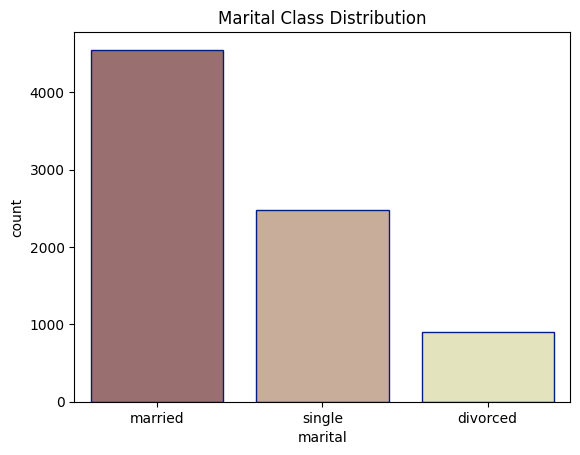

In [ ]:
sns.countplot(x = df["marital"], palette="pink", edgecolor=sns.color_palette("dark", 1)).set(title =  "Marital Class Distribution")

Here we can see the Married people are more subscribing a term deposit. As married people

# Jobs

<Axes: xlabel='age', ylabel='job'>

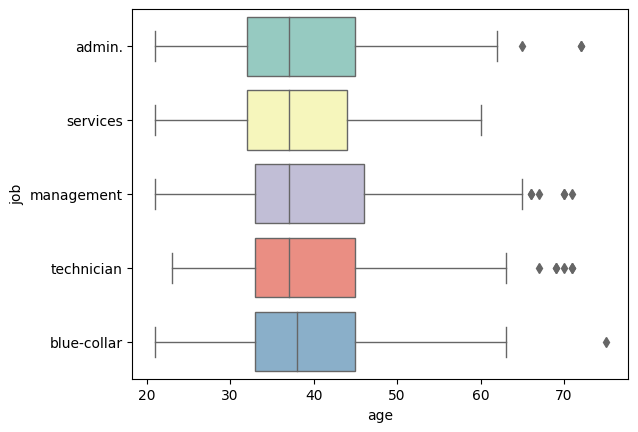

In [ ]:
top_jobs = (df.job.value_counts().sort_values(ascending=False).head(5).index.values)
sns.boxplot(y="job", x="age", data=df[df.job.isin(top_jobs)], orient="h",palette="Set3", linewidth=1)

The box plot shows that among the top-5 client categories, the most senior customers represent the management, and the largest number of outliers is among the admin. and technician.

Using the above scatter plot we can infer there is no clear relation between a client's age and balance

<Axes: xlabel='education', ylabel='age'>

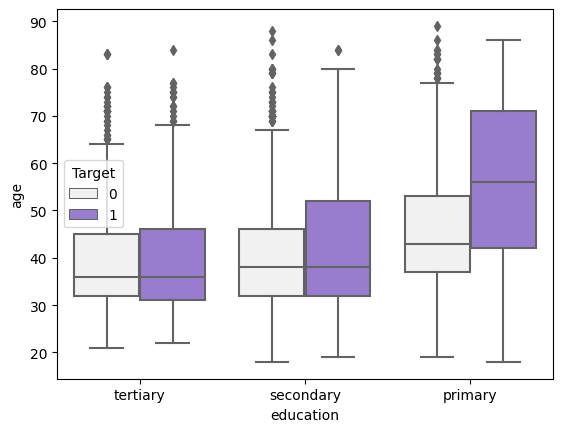

In [ ]:
sns.boxplot(x='education',y='age',hue='Target',data=df,color="mediumpurple")

There are outliers present in each education criteria . But the clients having primary education are more who have subscribed a term deposit

#Housing

Text(0.5, 1.0, 'Housing Distribution')

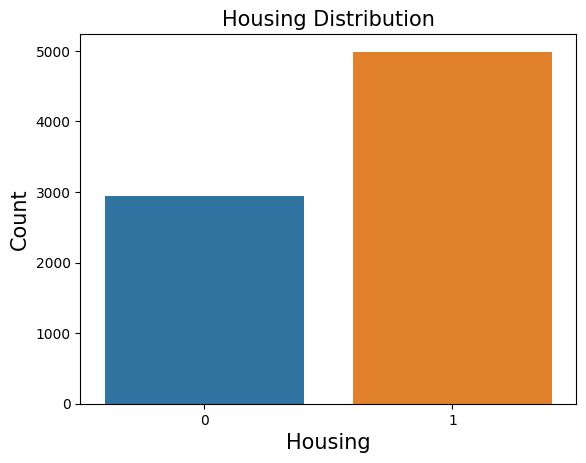

In [ ]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'housing',data = df)
plt.xlabel("Housing", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Housing Distribution', fontsize=15)

<Axes: xlabel='housing', ylabel='Target'>

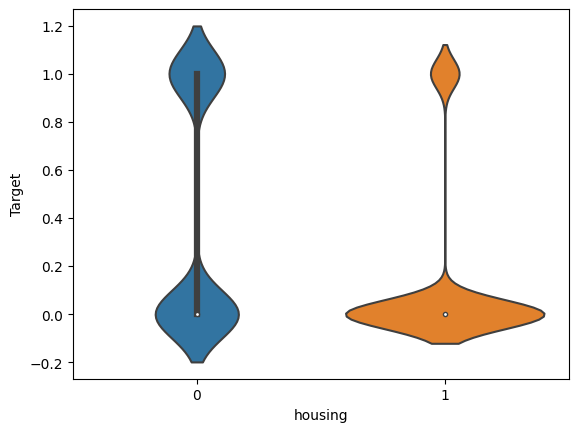

In [ ]:
sns.violinplot(x="housing", y="Target", data=df)

<Axes: xlabel='housing', ylabel='age'>

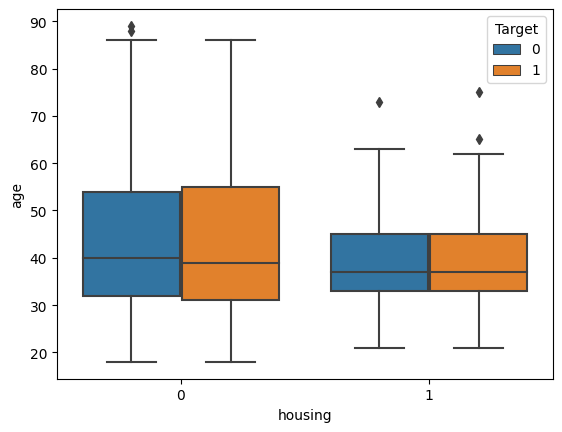

In [ ]:
sns.boxplot(x='housing',y='age',hue='Target',data=df)

The clients who don't have taken housing loan have subscribed a term deposite with more than 50% chances

# Target

Text(0.5, 1.0, 'Target distribution')

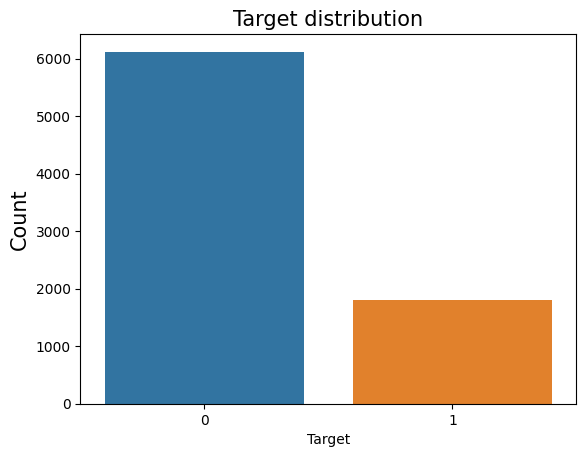

In [ ]:
sns.countplot(x = 'Target', data = df, orient = 'v')
plt.ylabel("Count", fontsize=15)
plt.title('Target distribution', fontsize=15)

Here we can see that data is imbalanced so accordingly we will have to use the ML models.


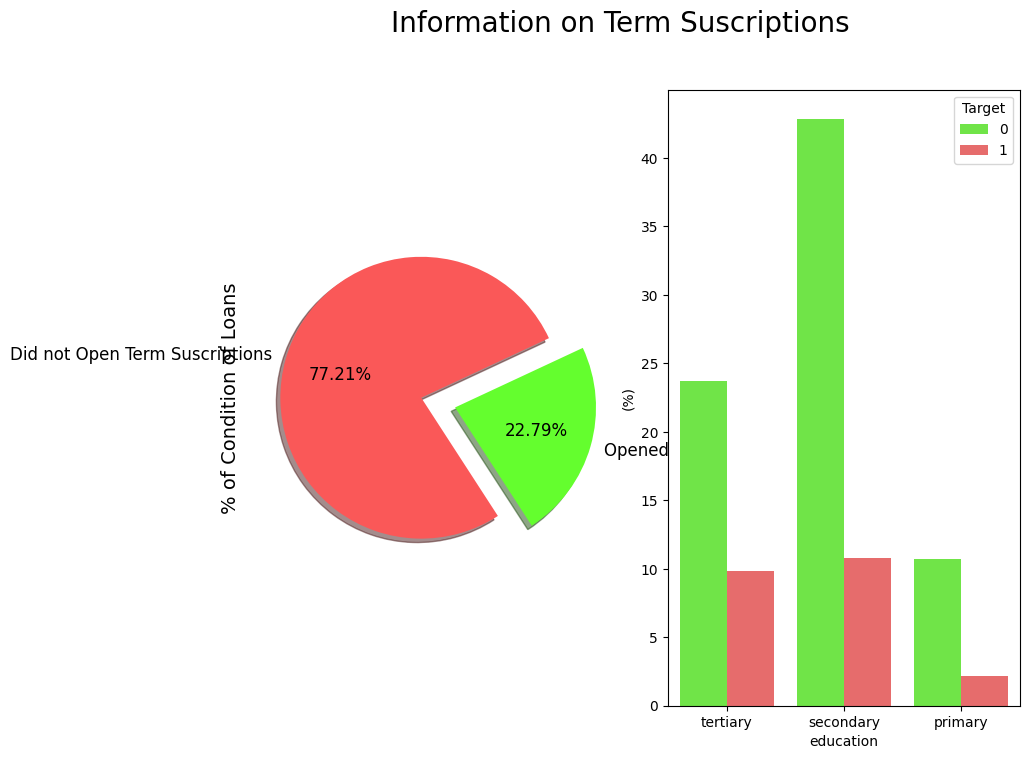

In [ ]:
f, ax = plt.subplots(1,2, figsize=(10,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["Target"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors,
                                             labels=labels, fontsize=12, startangle=25)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="Target", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

# P-outcome

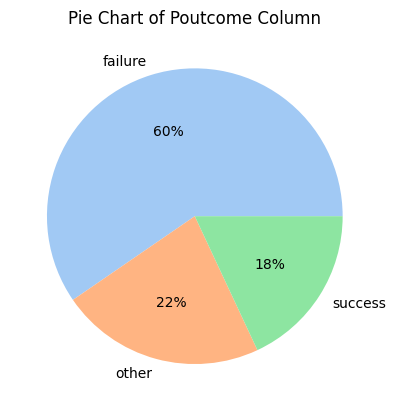

In [ ]:
df_p=df["poutcome"].value_counts()
palette_color = sns.color_palette('pastel')

# Create the pie chart
plt.pie(df_p, labels=df_p.index, colors=palette_color, autopct='%.0f%%')

# Add title to the chart
plt.title("Pie Chart of Poutcome Column")

# Display the chart
plt.show()

This pie chart describes that there was 60% failure for the previous term deposit subscription based on the above clients

In [ ]:
df_p

failure    4724
other      1775
success    1430
Name: poutcome, dtype: int64

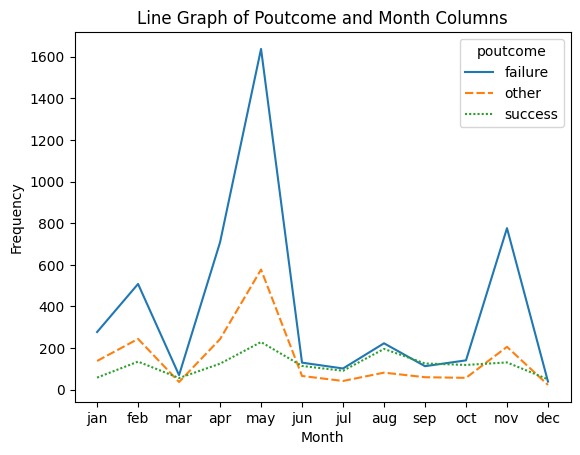

In [ ]:
# Define the order of the months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert the "month" column to a categorical variable with the correct order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Group the DataFrame by month and poutcome columns
df_grouped = df.groupby(["month", "poutcome"]).size().unstack(fill_value=0)

# Create a line graph
sns.lineplot(data=df_grouped)

# Add title and axis labels to the chart
plt.title("Line Graph of Poutcome and Month Columns")
plt.xlabel("Month")
plt.ylabel("Frequency")

# Display the chart
plt.show()

This line graph representing time series ananylsis represents the subscription of previous term deposits during the entire year

<Axes: xlabel='month', ylabel='count'>

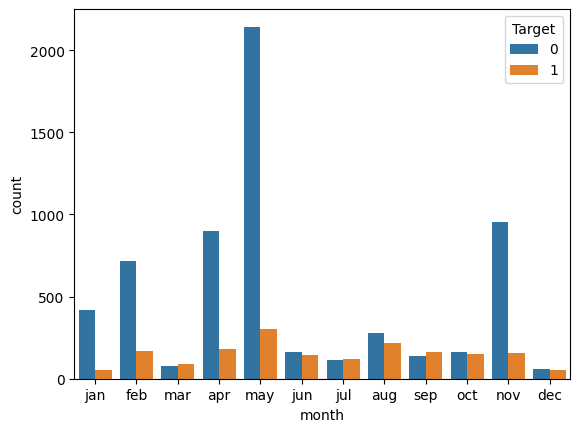

In [ ]:
sns.countplot(x='month', hue='Target', data=df)

This bar graph shows that most of the term deposit sunbsciption took place during the month of may but it also the most number of clients who denied on taking the deposit


In [ ]:
# Create a cross-tabulation table
table = pd.crosstab(df["education"], df["job"])

# Display the table
print(table)


job        admin.  blue-collar  entrepreneur  housemaid  management  retired  \
education                                                                      
primary        38          565            22         54          42      162   
secondary     872          956            84         57         185      209   
tertiary      153           33           106         35        1541       89   

job        self-employed  services  student  technician  unemployed  unknown  
education                                                                     
primary               15        53       17          28          21        3  
secondary             85       597      161         902         130       13  
tertiary             169        36       62         369          59        6  


In [ ]:
import plotly.express as px
Education = df.groupby('education')['Target'].sum().reset_index()
fig = px.pie(Education,
             values='Target',
             names='education',
             hole=0.5,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Education', title_font=dict(size=24),
                  width=700, height=500)
fig.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object for each categorical feature
job_le = LabelEncoder()
marital_le = LabelEncoder()
education_le = LabelEncoder()
default_le = LabelEncoder()
housing_le = LabelEncoder()
loan_le = LabelEncoder()
contact_le = LabelEncoder()
month_le = LabelEncoder()
poutcome_le = LabelEncoder()

# Fit and transform each categorical feature using its respective LabelEncoder
df['job'] = job_le.fit_transform(df['job'])
df['marital'] = marital_le.fit_transform(df['marital'])
df['education'] = education_le.fit_transform(df['education'])
df['default'] = default_le.fit_transform(df['default'])
df['housing'] = housing_le.fit_transform(df['housing'])
df['loan'] = loan_le.fit_transform(df['loan'])
df['contact'] = contact_le.fit_transform(df['contact'])
df['month'] = month_le.fit_transform(df['month'])
df['poutcome'] = poutcome_le.fit_transform(df['poutcome'])

# Print the first five rows of the modified DataFrame
print(df.head())


       age  job  marital  education  default  balance  housing  loan  contact  \
24060   33    0        1          2        0      882        0     0        1   
24062   42    0        2          1        0     -247        1     1        1   
24064   33    7        1          1        0     3444        1     0        1   
24072   36    4        1          2        0     2415        1     0        1   
24077   36    4        1          2        0        0        1     0        1   

       day  month  duration  campaign  pdays  previous  poutcome  Target  
24060   21     10        39         1    151         3         0       0  
24062   21     10       519         1    166         1         1       1  
24064   21     10       144         1     91         4         0       1  
24072   22     10        73         1     86         4         1       0  
24077   23     10       140         1    143         3         0       1  


# **Model Selection**

# Logistic reg

In [ ]:
y = df.Target.values
x = df.drop(['Target'], axis = 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_log = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score
cm_log = confusion_matrix(y_test, y_pred_log)
print('Confusion Matrix:\n', cm_log)
print('Classification Report:\n', classification_report(y_test, y_pred_log))
RFC=lr.score(x_test , y_test)
print(RFC)
recall_score(y_test,y_pred_log)

Confusion Matrix:
 [[1718  122]
 [ 292  247]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      1840
           1       0.67      0.46      0.54       539

    accuracy                           0.83      2379
   macro avg       0.76      0.70      0.72      2379
weighted avg       0.81      0.83      0.81      2379

0.8259773013871374


0.4582560296846011

In [ ]:
y_pred_log=lr.predict(x_test)
y_pred_log

array([0, 0, 0, ..., 0, 0, 0])

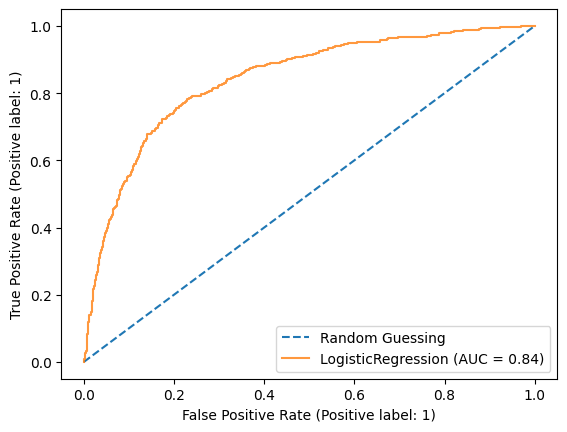

In [ ]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
log_disp = RocCurveDisplay.from_estimator(lr, x_test, y_test, ax=ax, alpha=0.8)
plt.show()

# Random forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
rfc.fit(x_train, y_train)
y_pred_rf = rfc.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score
cm = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', classification_report(y_test, y_pred_rf))
RFC=rfc.score(x_test , y_test)
print(RFC)
recall_score(y_test,y_pred_rf)

Confusion Matrix:
 [[1722  118]
 [ 208  331]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1840
           1       0.74      0.61      0.67       539

    accuracy                           0.86      2379
   macro avg       0.81      0.77      0.79      2379
weighted avg       0.86      0.86      0.86      2379

0.8629676334594367


0.614100185528757

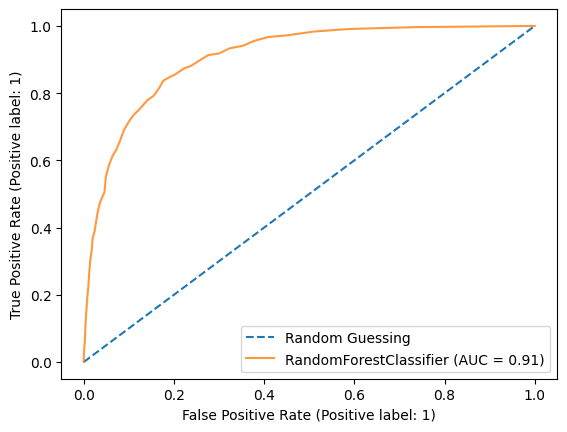

In [ ]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=ax, alpha=0.8)
plt.show()

# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=50,learning_rate=0.1, random_state=0)
abc.fit(x_train, y_train)

# Make predictions on the test set
y_pred_abc = abc.predict(x_test)

# Calculate accuracy score
acc = accuracy_score(y_test, y_pred_abc)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 86.21%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score
cm_ada = confusion_matrix(y_test, y_pred_abc)
print('Confusion Matrix:\n', cm_ada)
print('Classification Report:\n', classification_report(y_test, y_pred_abc))
recall_score(y_test,y_pred_abc)

Confusion Matrix:
 [[1760   80]
 [ 248  291]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91      1840
           1       0.78      0.54      0.64       539

    accuracy                           0.86      2379
   macro avg       0.83      0.75      0.78      2379
weighted avg       0.86      0.86      0.85      2379



0.5398886827458256

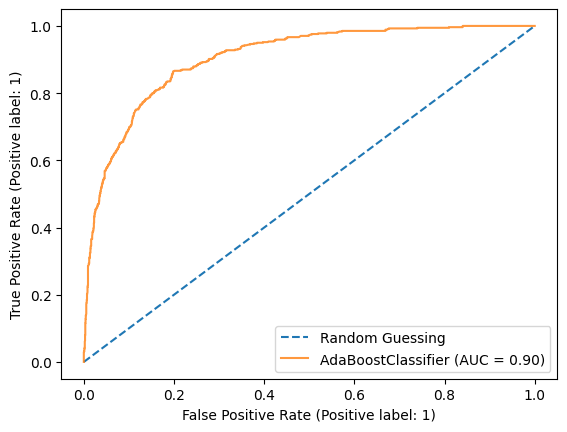

In [ ]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
ada_disp = RocCurveDisplay.from_estimator(abc, x_test, y_test, ax=ax, alpha=0.8)
plt.show()

# XGBoost

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
model= XGBClassifier(n_estimators = 50,random_state=0)
model.fit(x_train,y_train)

# Predict on the test set and calculate accuracy
y_pred_xg = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_xg)
print("Accuracy:", accuracy)

Accuracy: 0.8575031525851198


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score
cm_xg = confusion_matrix(y_test, y_pred_xg)
print('Confusion Matrix:\n', cm_xg)
print('Classification Report:\n', classification_report(y_test, y_pred_xg))
RFC=model.score(x_test , y_test)
print(RFC)
recall_score(y_test,y_pred_xg)

Confusion Matrix:
 [[1694  146]
 [ 193  346]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1840
           1       0.70      0.64      0.67       539

    accuracy                           0.86      2379
   macro avg       0.80      0.78      0.79      2379
weighted avg       0.85      0.86      0.86      2379

0.8575031525851198


0.6419294990723562

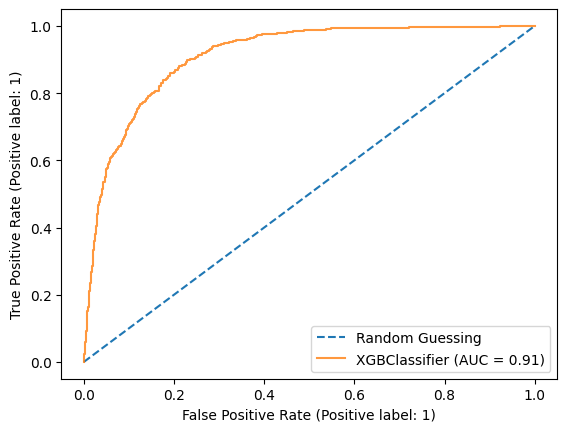

In [ ]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
xg_disp = RocCurveDisplay.from_estimator(model, x_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [ ]:
import pickle
pickle.dump(model, open('xg_model.pkl', 'wb'))